In [1]:
import PySimpleGUI as sg
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

In [5]:
class Toolbar(NavigationToolbar2Tk):
    def __init__(self, *args, **kwargs):
        super(Toolbar, self).__init__(*args, **kwargs)

class calculadora:
    
    
    def __init__(self):
        self.operadores_binarios = ['*', '/', '+', '-']
        self.operadores_unarios = ['sqrt', 'e', 'log', 'cos']
        self.nuevos = False
        self.l = []
        self.reset()
    
    #Definimos los elementos de la ventana
    def reset(self, *args):
        sg.theme('DarkAmber')
        self.name = "Calculadora"   
        self.layout1 = [  [sg.Text(font = ("Helvetica", 20)), sg.InputText(font = ("Helvetica", 20), key = "Entrada")]]
        
        self.layout2 = [[sg.Button('+', font = ("Helvetica", 20)), sg.Button('-', font = ("Helvetica", 20))
             , sg.Button('*', font = ("Helvetica", 20)), sg.Button('/', font = ("Helvetica", 20)), sg.Button('cos', font = ('Helvetica', 20))],
             [sg.Button('sqrt', font = ("Helvetica", 20)), sg.Button("exp", font = ("Helvetica", 20)),
             sg.Button('log', font = ("Helvetica", 20))],
             [sg.Button('(', font = ("Helvetica", 20)), sg.Button(')', font = ("Helvetica", 20))],
             [sg.Button('Izquierda', font = ("Helvetica", 20)), sg.Button('Derecha', font = ("Helvetica", 20))]]
        
        self.layout3 = [ [sg.Button('7', font = ("Helvetica", 20)),sg.Button('8', font = ("Helvetica", 20)),
            sg.Button('9', font = ("Helvetica", 20))],
                   [sg.Button('4', font = ("Helvetica", 20)),sg.Button('5', font = ("Helvetica", 20)),
            sg.Button('6', font = ("Helvetica", 20))],
            [sg.Button('1', font = ("Helvetica", 20)),sg.Button('2', font = ("Helvetica", 20)), sg.Button('3', font = ("Helvetica", 20))],
             [sg.Button('0', font = ("Helvetica", 20)),sg.Button('.', font = ("Helvetica", 20))
              ,sg.Button('j', font = ("Helvetica", 20))]]
        
        self.layout4 = [ [sg.Text(size = (30, 4), font = ("Helvetica", 20), key = 'Resultado')]]
        
        self.layout5 = [ [sg.Button('=', font = ("Helvetica", 20), size = (2,5), bind_return_key=True)] ]
        
        self.layout6 = [ [sg.Button('AC', font = ("Helvetica", 20), size = (2,5))] ]
        
        self.layout7 = [ [sg.Button("DEL", font = ("Helvetica", 20), size = (2,5))] ]
        
        self.layout8 = [ [sg.Button('Salir', font = ("Helvetica", 20))] ]
        
        self.menu_def = [['Menu', ['Nueva Funcion', ['Unaria'],]],
                ['Modo', ['Calculadora', 'Graficadora']],]
        
        args = list(args)
        #Aqui añadimos los botones nuevos
        if len(args) != 0:
            for i in range(len(args[0])):
                
                self.layout8.append([sg.Button(args[0][i], font = ("Helvetica", 20))])
        
        self.layout = [[sg.Column(self.layout1)], [sg.Text('_'*107)],
        [sg.Column(self.layout2), sg.VerticalSeparator(), sg.Column(self.layout3), sg.VerticalSeparator(),
         sg.Column(self.layout5), sg.VerticalSeparator(), sg.Column(self.layout6), sg.VerticalSeparator(), sg.Column(self.layout7)],
        [sg.Text('_'*107)], [sg.Column(self.layout8)], [sg.Menu(self.menu_def)]]
        
        
        
    # Esta función nos permite ver de que tipo numérico es un argumento de tipo string.
    # Si no es posible convertirlo a numérico devuelve str
    def tipo(self, x, bandera = False) -> type:
        try:
            int(x)
            return int
        except:
            try:
                float(x)
                return float
            except:
                try:
                    complex(x)
                    if bandera:
                        return complex(x)
                    else:
                        return complex
                except:
                    try:
                        X = x.split('+')
                        x = X[1] + '+' + X[0]
                        complex(x)
                        if bandera:
                            return complex(x)
                        else:
                            return complex
                    except:
                        try:
                            X = x.split('-')
                            x = X[1] + '-' + X[0]
                            complex(x)
                            if bandera:
                                return complex(x)
                            else:
                                return complex
                        except:
                            return str
                        
    # Aquí añadimos una operación unaria
    def agregar_unario(self, operador:str):
        self.operadores_unarios.append(operador)
        self.l.append(operador)
        self.nuevos = True
        
    def evaluate(self, x: str): 
        import numpy as np
        for i in self.operadores_unarios:
            x = x.replace(i, 'np.'+i)
        x = x.replace('X','1')
        if self.tipo(eval(x)) == str:
            return "Error"
        else:
            temp = eval(x)
            if temp == 0:
                return 0
            else:
                return temp
            
    def graficar(self, *args, rango = (-1, 1), show = True, borrar = False):
        import matplotlib.pyplot as plt
        import numpy as np
        
        if borrar:
            plt.plot((-1,1))
            plt.clf()
            
        else:
            for x in args:
                label = x
                x = x.replace(' ','')
                x = x[x.find('=')+1:]
                X = [i for i in np.linspace(rango[0], rango[1], 100)]
                Y = [x.replace('X', str(i)) for i in X]
                try:
                    Y = [self.evaluate(i) for i in Y]
                except:
                    print(x)
                    print("No pude entender la entrada. Verifica que la función que ingresaste este en mis opciones")
                plt.plot(X, Y, label = label)
            plt.legend()
            if show:
                plt.show()
        
        
    # run se encarga de correr todo junto
    def run(self):
        # Cada vez que se corre debemos reiniciar los layouts
        if self.nuevos:
            self.reset(self.l)
        else:
            self.reset()
        temp = 0

        sg.theme('DarkAmber')
        window = sg.Window('Calculadora', self.layout)
        sg.theme('DarkAmber')
        operacion = ''
        entrada = ''
        lugar = 'derecha'
        
        while True:
    
            event, values = window.read(timeout = 1000)
            
            if event == "Unaria":
                window.close()
                funcion = sg.popup_get_text('Ingrese la nueva función', font = ("Helvetica", 20), size = (40, 40))
                self.agregar_unario(funcion)
                self.run()
                break
                
            elif event == "Calculadora":
                continue
                
            elif event == "Graficadora":
                window.close()
                self.run_graf()
            
            if event == sg.TIMEOUT_KEY:
                entrada = values["Entrada"].replace("__TIMEOUT__",'')
                continue
                
            if event == sg.WIN_CLOSED or event == 'Salir': # if user closes window or clicks cancel
                break
            if event == 'Izquierda':
                lugar = 'izquierda'
                continue
            elif event == 'Derecha':
                lugar = 'derecha'
                continue
            elif event == "DEL":
                entrada = entrada[0:-1]
                window["Entrada"].update(entrada)
                continue
            
            if event != '=' and event != "AC":
                if lugar == 'izquierda':
                    entrada = str(event) + entrada
                else:
                    entrada = entrada + str(event)
                window["Entrada"].update(entrada)
                
            elif event == "AC":
                entrada = ""
                window["Entrada"].update(entrada)
                
                
            elif event == '=':
                try:
                    try:
                        entrada = values['Entrada']
                    except:
                        entrada = ''
                    entrada = str(self.evaluate(entrada))
                    window["Entrada"].update(entrada)
                except:
                    entrada = "Error"
                    window["Entrada"].update(entrada)            
                

            if temp == 0:
                temp = 0

        window.close()
    


        
    def run_graf(self):
        menu_def = [['Menu', ['Nueva Funcion', ['Unaria'],]],
                ['Modo', ['Calculadora', 'Graficadora']],]
        
        layout = [
            [sg.T('Entrada', font = ("Helvetica", 15) )],
            [sg.I('')],
            [sg.T("Las funciones deben tener el siguiente formato: 'y = X'", font = ("Helvetica", 15))],
            [sg.T("La variable X debe ir en mayuscula y cada función va separada por una coma", font = ("Helvetica", 15))],
            [sg.B('Graficar', font = ("Helvetica", 15), bind_return_key=True)],
            [sg.T("Rango: ", font = ("Helvetica", 15)), sg.I("", key = '-range-')],
            [sg.T("El rango debe ser una tupla", font = ("Helvetica", 15))],
            [sg.B("Ingresar Rango", font = ("Helvetica", 15))],
            [sg.T('Controls:', font = ("Helvetica", 15))],
            [sg.Canvas(key='controls_cv')],
            [sg.T('Figura:', font = ("Helvetica", 15))],
            [sg.Column(
                layout=[
                    [sg.Canvas(key='fig_cv',
                               # it's important that you set this size
                               size=(400 * 2, 400)
                               )]
                ],
                background_color='#DAE0E6',
                pad=(0, 0)
            )],
            [sg.B('Borrar', font = ("Helvetica", 15))],
            [sg.B('Exit', font = ("Helvetica", 15))],
            [sg.Menu(self.menu_def)]

        ]

        window = sg.Window('Gráfica', layout)
        rango = (-1, 1)
        graficar_por_rango = False
        while True:
            event, values = window.read(timeout = 1)
            
            if event == "Unaria":
                window.close()
                funcion = sg.popup_get_text('Ingrese la nueva función', font = ("Helvetica", 15), size = (40, 40))
                self.agregar_unario(funcion)
                self.run_graf()
                break
            
            elif event == "Calculadora":
                window.close()
                self.run()
                
            elif event == "Graficadora":
                continue
                
            if event == "Ingresar Rango":
                if values["-range-"]!='':
                    temp = values["-range-"]
                    temp = temp.split(',')
                    temp[0] = temp[0].replace('(','')
                    temp[0] = temp[0].replace(' ','')
                    temp[1] = temp[1].replace(')','')
                    temp[1] = temp[1].replace(' ','')
                    try:
                        rango = (float(temp[0]), float(temp[1]))
                        graficar_por_rango = True
                    except:
                        sg.Popup("El valor de rango no fue válido")
                        continue
                
            if event in (sg.WIN_CLOSED, 'Exit'):  # always,  always give a way out!
                break

            if event is "Graficar" or graficar_por_rango:
                graficar_por_rango = False
                plt.figure(1)
                fig = plt.gcf()
                DPI = fig.get_dpi()
                fig.set_size_inches(404 * 2 / float(DPI), 404 / float(DPI))
                temp = self.graficar(values[0], rango = rango, show = False)
                if temp != None:
                    sg.Popup(temp)

                draw_figure_w_toolbar(window['fig_cv'].TKCanvas, fig, window['controls_cv'].TKCanvas)
                
            if event == "Borrar":
                self.graficar(borrar = True)
                try:
                    draw_figure_w_toolbar(window['fig_cv'].TKCanvas, fig, window['controls_cv'].TKCanvas)
                except:
                    None
                
                    
        window.close()
        
        
######### FIN DE CLASE CALCULADORA ###########
        
def draw_figure_w_toolbar(canvas, fig, canvas_toolbar):
    if canvas.children:
        for child in canvas.winfo_children():
            child.destroy()
    if canvas_toolbar.children:
        for child in canvas_toolbar.winfo_children():
            child.destroy()
    figure_canvas_agg = FigureCanvasTkAgg(fig, master=canvas)
    figure_canvas_agg.draw()
    toolbar = Toolbar(figure_canvas_agg, canvas_toolbar)
    toolbar.update()
    figure_canvas_agg.get_tk_widget().pack(side='right', fill='both', expand=1)


In [6]:
calc = calculadora()

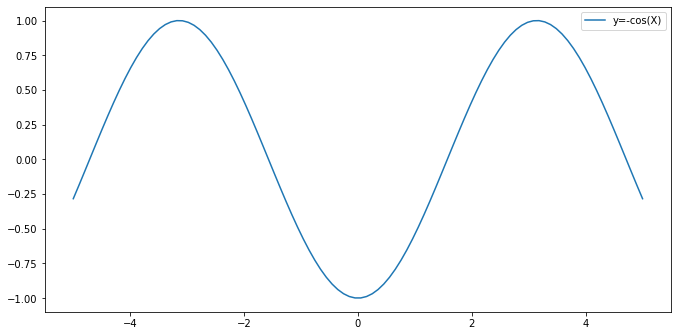

In [7]:
calc.run_graf();